<a href="https://colab.research.google.com/github/park-geun-hyeong/practice_pytorch/blob/main/Iris_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upgrade Sklearn

In [ ]:
!pip install --upgrade scikit-learn

## Library Import 

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]] ## petal에 관련된 Feature만 사용할 예정 
y = iris.target
print("class label: ", np.unique(y))

class label:  [0 1 2]


In [8]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

In [9]:
iris_df ## 실제 iris Data의 형태(DataFrame)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


0    50
1    50
2    50
Name: Target, dtype: int64


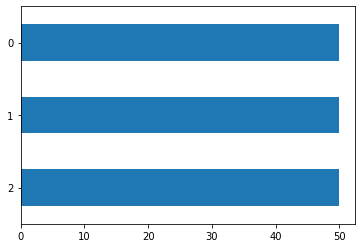

In [185]:
iris_df['Target'].value_counts().plot.barh() ## iris data의 target값들은 0,1,2 각각 50 개씩 구성되어 있다.
print(iris_df['Target'].value_counts().sort_index())

## Split Train, Test DataSet

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 2), (105,), (45, 2), (45,))

##Normalization

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [72]:
X_train_01_subset = X_train_std[(y_train==0) | (y_train==1)] ## Target값에는 0,1,2 가 있지만 이진 분류를 위해 0,1의 값을 가지는 data들만 분리
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]

In [73]:
X_train_01_subset.shape, y_train_01_subset.shape

((70, 2), (70,))

In [74]:
X_train_std[(y_train==0)].shape,X_train_std[(y_train==1)].shape

((35, 2), (35, 2))

##Visualization Data

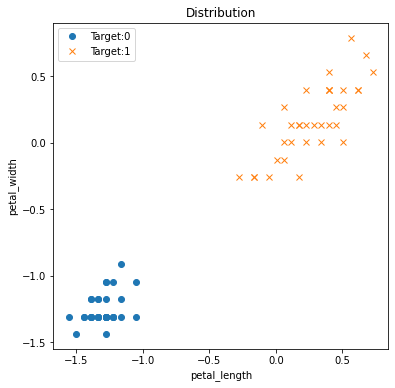

In [180]:
plt.figure(figsize=(6,6))
plt.plot(X_train_std[(y_train==0)][:,0] , X_train_std[(y_train==0)][:,1], 'o')
plt.plot(X_train_std[(y_train==1)][:,0] , X_train_std[(y_train==1)][:,1], 'x')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Distribution')
plt.legend(['Target:0','Target:1'])
plt.show()

In [75]:
X_test_01_subset = X_test_std[(y_test==0) | (y_test==1)] ## Test data역시 0,1의 target_value만 가지고 있는 data들로 분리
y_test_01_subset = y_test[(y_test==0) | (y_test==1)]

In [76]:
X_test_01_subset.shape, y_test_01_subset.shape

((30, 2), (30,))

In [77]:
X_train_01_subset = torch.FloatTensor(X_train_01_subset) ## pytorch 연산을 위해 floattensor 형태로 data 변환
y_train_01_subset = torch.FloatTensor(y_train_01_subset)
X_test_01_subset = torch.FloatTensor(X_test_01_subset)
y_test_01_subset = torch.FloatTensor(y_test_01_subset)

print(type(X_train_01_subset),type(y_train_01_subset),type(X_test_01_subset),type(y_test_01_subset))

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


## Make Model

In [78]:
trained_weight = torch.zeros((2,1),requires_grad=True) 
trained_bias = torch.zeros(1, requires_grad=True)

In [79]:
trained_weight, trained_bias

(tensor([[0.],
         [0.]], requires_grad=True), tensor([0.], requires_grad=True))

In [128]:
optimizer = optim.Adam([trained_weight,trained_bias], lr=0.01) ## Adam optimizer 사용

In [129]:
from tqdm import tqdm_notebook

In [132]:
epochs = 1000

for epoch in tqdm_notebook(range(epochs)):

    hypothesis = 1 / (1+torch.exp(-(X_train_01_subset.matmul(trained_weight)+trained_bias)))
    hypothesis = hypothesis.reshape(70,) # loss 계산을 위해 y_train과 shape 일치 시켜주기
    loss = F.binary_cross_entropy(hypothesis, y_train_01_subset)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch%100==0:
        print(f'epoch: {epoch}, loss: {loss.item():.4f}')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


epoch: 0, loss: 0.0173
epoch: 100, loss: 0.0151
epoch: 200, loss: 0.0133
epoch: 300, loss: 0.0118
epoch: 400, loss: 0.0106
epoch: 500, loss: 0.0095
epoch: 600, loss: 0.0086
epoch: 700, loss: 0.0078
epoch: 800, loss: 0.0071
epoch: 900, loss: 0.0065



In [133]:
trained_weight, trained_bias ## 학습을 마친 Weight와 Bias

(tensor([[4.1544],
         [4.0655]], requires_grad=True), tensor([5.0298], requires_grad=True))

##Prediction Test Data

In [159]:
test_hypothesis = torch.sigmoid(X_test_01_subset.matmul(trained_weight)+trained_bias) ## 학습된 weight와 bias를 통해 TestData 에측 

In [166]:
prediction = torch.round(test_hypothesis).reshape(-1,)

In [167]:
prediction.shape, y_test_01_subset.shape

(torch.Size([30]), torch.Size([30]))

In [181]:
num = torch.sum(prediction == y_test_01_subset)
test_accuracy = num/30
print(test_accuracy)

tensor(1.)


## Submission

In [178]:
print("weight", trained_weight)
print("bias:", trained_bias)
print("test accuracy:", test_accuracy)

weight tensor([[4.1544],
        [4.0655]], requires_grad=True)
bias: tensor([5.0298], requires_grad=True)
test accuracy: tensor(1.)
